# Analysis Demo

In [1]:
# Disable warnings for prettier notebook
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import anndata as ad
import scanpy as sc
import squidpy as sq

In [3]:
from popari import pl, tl
from popari.model import load_trained_model

## Load trained model

In [4]:
demo = load_trained_model("demo.h5ad", verbose=0) # Replace with path to your trained model

```{note}
All data (including input gene expression data, spatial coordinates, learned embeddings/metagenes/spatial affinities) can be found within the `popari.model.Popari.datasets` attribute. You can build your own analysis functions that access these data; see `popari.analysis` and `popari._dataset_utils` for examples.
```

## Postprocessing

### Normalizing embeddings

In [5]:
tl.preprocess_embeddings(demo, normalized_key="normalized_X")

### Leiden clustering

In [6]:
tl.leiden(demo, use_rep="normalized_X")

### Compute empirical spatial correlation of learned embeddings

In [7]:
tl.compute_empirical_correlations(demo, feature="X")

## Plotting

### Plotting ground truth and clustering results

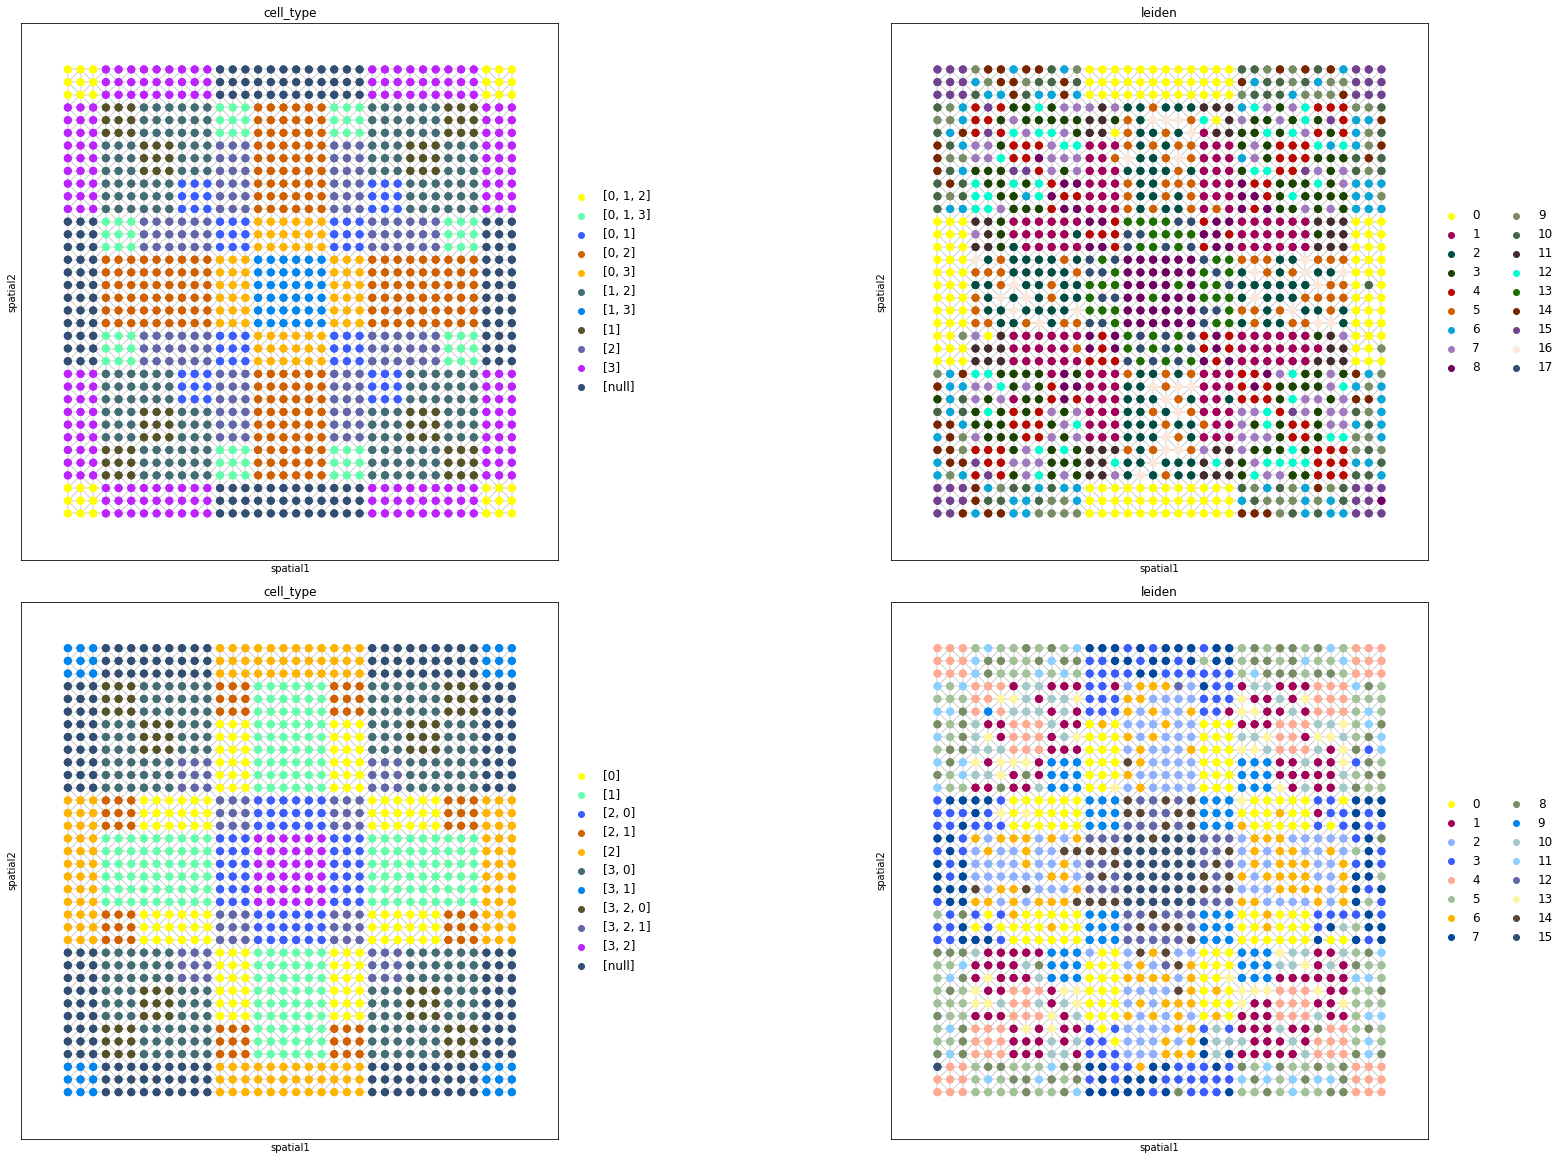

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(24, 16), constrained_layout=True)
pl.in_situ(demo, color="cell_type", legend_fontsize="large", size=200, axes=axes[:, 0])
pl.in_situ(demo, color="leiden", legend_fontsize="large", size=200, axes=axes[:, 1])

### Plot empirical spatial correlation of metagenes

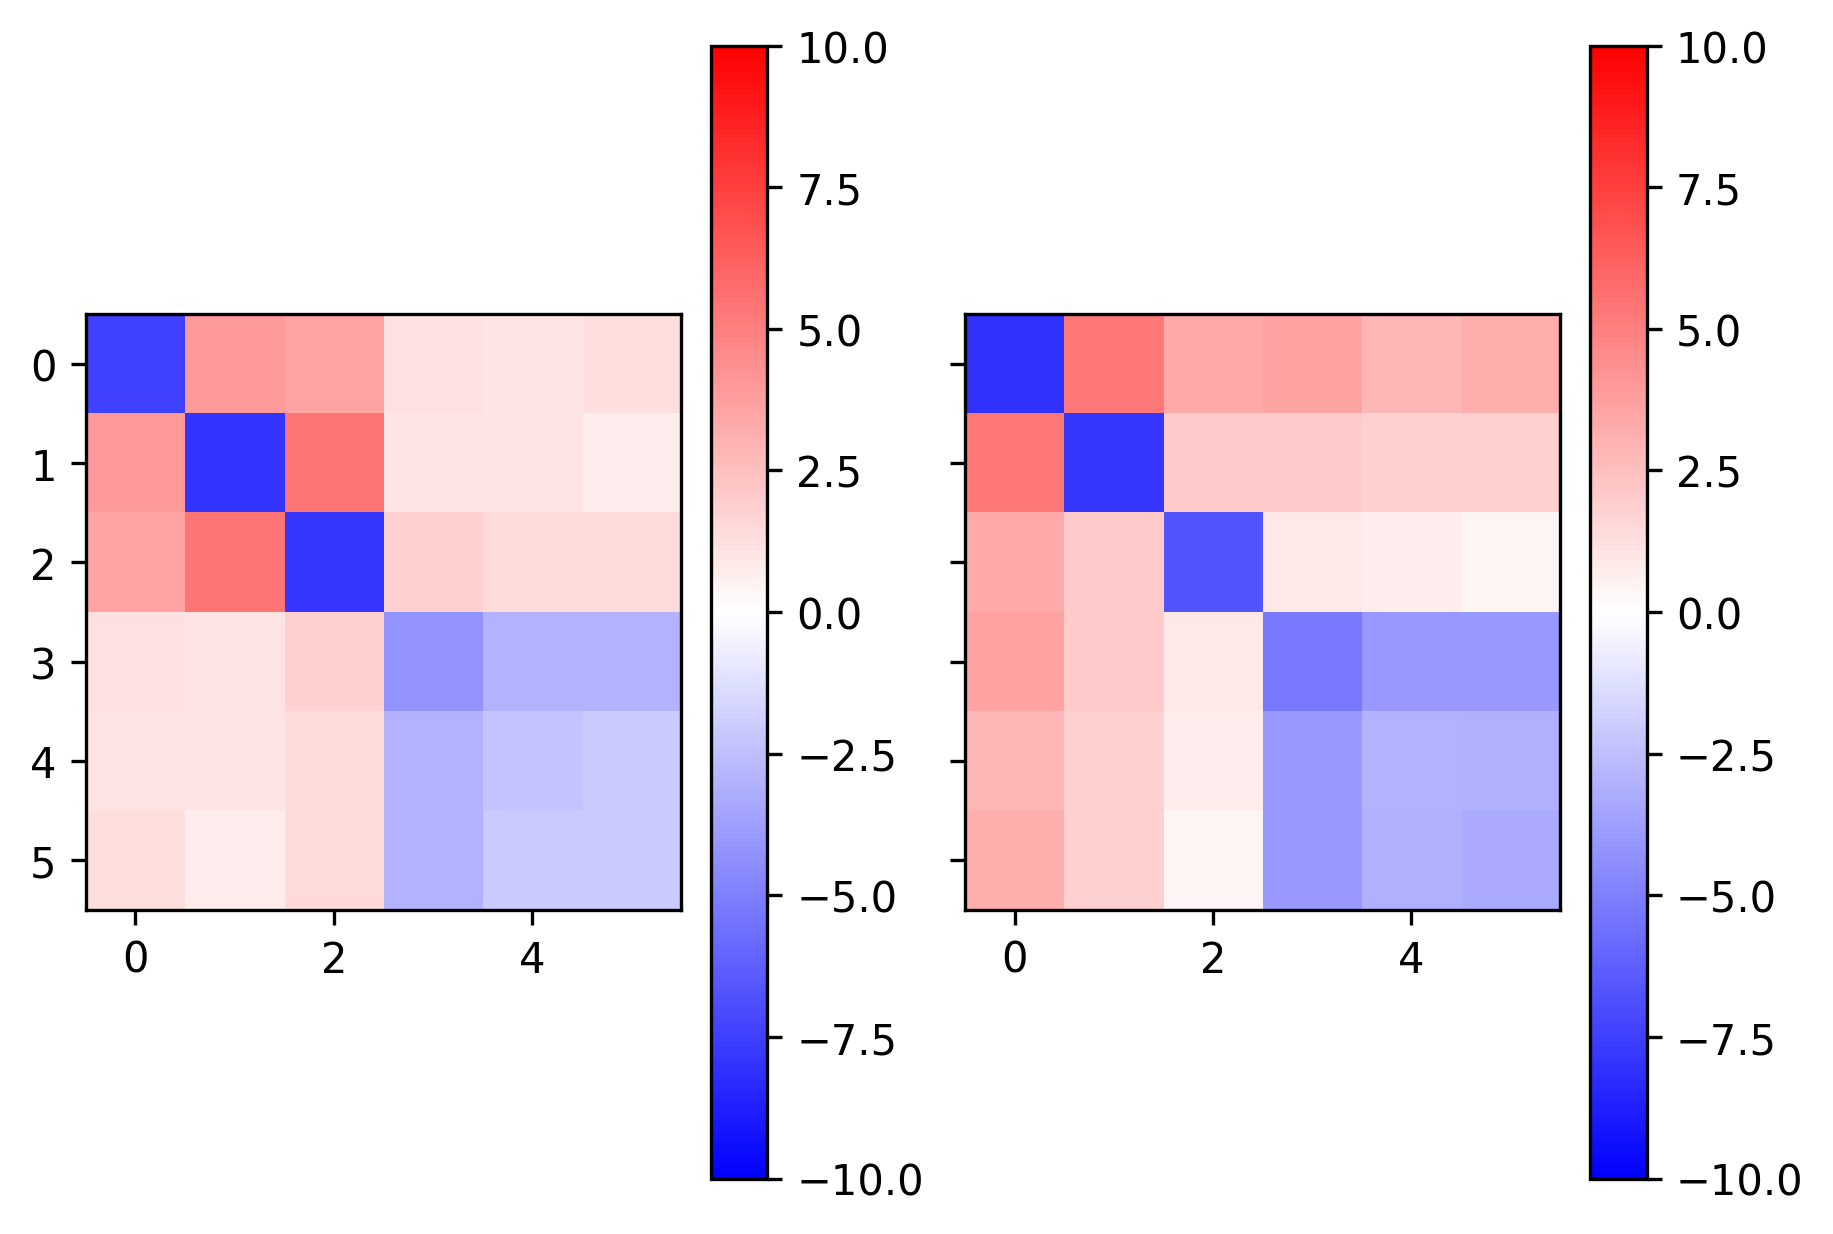

In [9]:
pl.multireplicate_heatmap(demo, uns="empirical_correlation", aspect=1, cmap="bwr", vmin=-10, vmax=10)

### Plot learned spatial affinities of metagenes

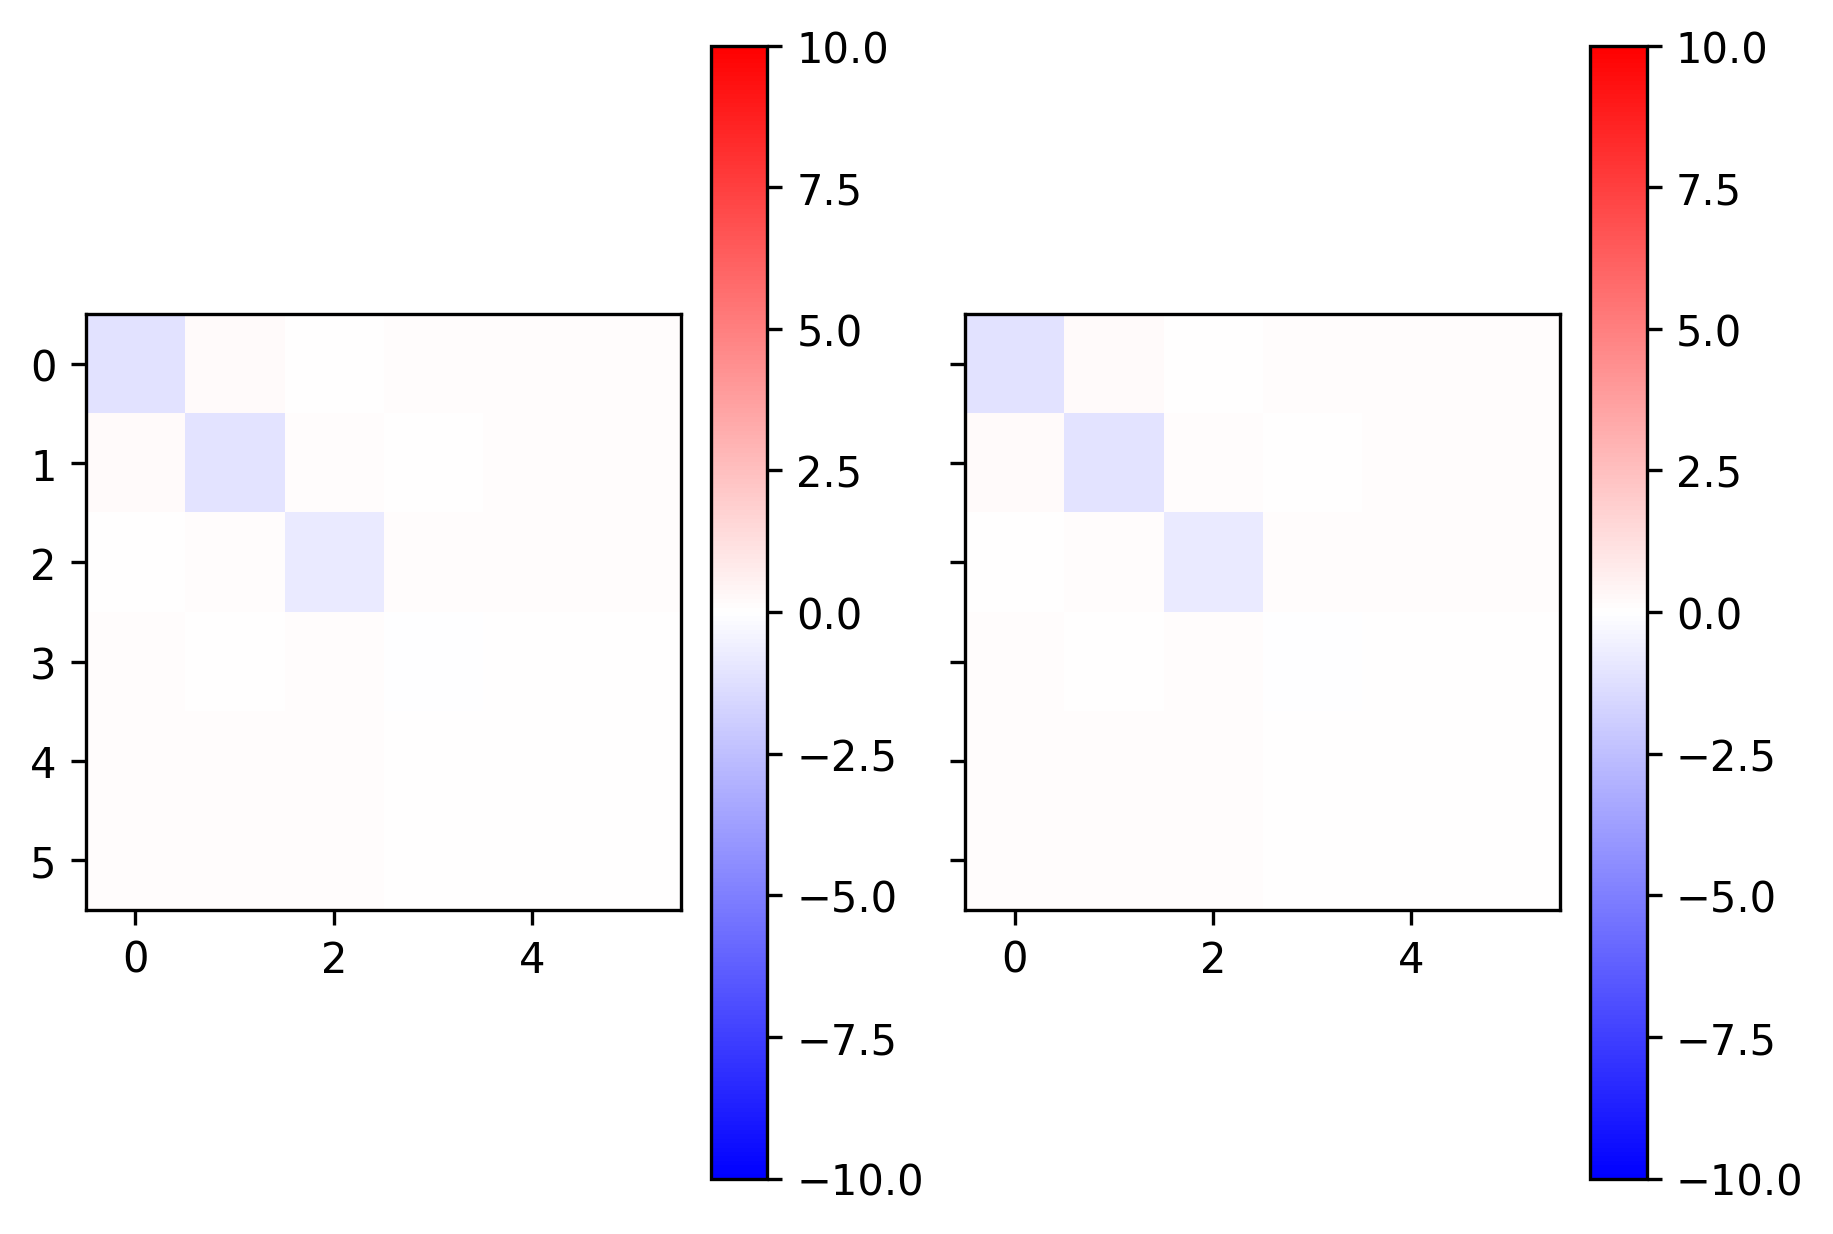

In [10]:
pl.multireplicate_heatmap(demo, uns="Sigma_x_inv", aspect=1, cmap="bwr", vmin=-10, vmax=10)

### Custom plotting function

You can create your own plotting functions using the `popari._dataset_utils._broadcast_operator` function.

In [11]:
# TODO